In [22]:
import numpy as np 
import seaborn as sns
import sys
import cv2

In [23]:
paths = ['E:\\LogisticRegression\\Shared\\Shared_ReadData', 'E:\\LogisticRegression\\Shared', 'E:\\LogisticRegression\\Shared\\Shared_Model']
for path in paths:
    sys.path.append(path)
print(sys.path)

['e:\\LogisticRegression\\DogBreedClassification', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'E:\\LogisticRegression\\Shared\\Shared_ReadData', 'E:\\LogisticRegression\\Shared', 'E:\\LogisticRegression\\Shared\\Shared_Model', 'E:\\LogisticRegression\\Shared\\Shared_ReadData', 'E:\\LogisticRegression\\Shared', 'E:\\LogisticRegression\\Shared\\Share

In [24]:
import Shared_Implementation_ReadData as simr
from Shared_Implementation_Model import logisticRegression
import Shared_AttachLabel as sa
from Shared_RemoveBackground import removeBackground

In [25]:
base_path = 'E:/LogisticRegression/DogBreedClassification/Dataset/'
breed_folder = ['German_Shepherd', 'Golden_Retriever']
img = simr.ReadData()

In [26]:
german_shepherd_img = []
golden_retriever_img = []

In [27]:
for folder in breed_folder:
    img_collection = img.read_image_jpg(base_path, folder)
    if folder == "German_Shepherd":
        german_shepherd_img.extend(img_collection)
    if folder == "Golden_Retriever":
        golden_retriever_img.extend(img_collection)

print("Number of images in German_Shepherd:", len(german_shepherd_img))
print("Number of images in Golden_Retriever:", len(golden_retriever_img))  

Number of images in German_Shepherd: 58
Number of images in Golden_Retriever: 58


In [28]:
german_rembg = 'E:\LogisticRegression\DogBreedClassification\Dataset\German_Shepherd_rembg'
golden_rembg = 'E:\LogisticRegression\DogBreedClassification\Dataset\Golden_Retriever_rembg'


In [29]:
# removeBackground(german_rembg, 1, german_shepherd_img)
# removeBackground(golden_rembg, 1, golden_retriever_img)

In [30]:
rembg_breed_folder = ['German_Shepherd_rembg', 'Golden_Retriever_rembg']
rembg_german_shepherd_img = []
rembg_golden_retriever_img = []

In [31]:
for folder in rembg_breed_folder:
    img_collection = img.read_image_png(base_path, folder)
    if folder == "German_Shepherd_rembg":
        rembg_german_shepherd_img.extend(img_collection)
    if folder == "Golden_Retriever_rembg":
        rembg_golden_retriever_img.extend(img_collection)

In [32]:
# attach label to:
# German_Shepherd = 0
# Golden_Retriever = 1
X = [] 
y = []
sa.attach_label(rembg_german_shepherd_img, "German_Shepherd_rembg", X, y)
sa.attach_label(rembg_golden_retriever_img, "Golden_Retriever_rembg", X, y)

In [33]:
model = logisticRegression()
model.build_model(X, y)
prediction = model.predict(model.X_test)
print(prediction)

[1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1]


In [34]:
print(model.classificationReport(model.y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.60      0.50      0.55        12

    accuracy                           0.58        24
   macro avg       0.59      0.58      0.58        24
weighted avg       0.59      0.58      0.58        24



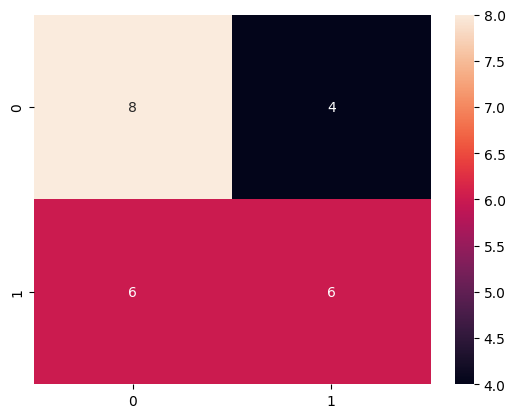

In [35]:
model.heat_map(model.y_test, prediction)

In [36]:
path = 'E:/LogisticRegression/DogBreedClassification/Test'
german_test_imgs = img.read_image_jpg(path, 'german_shepherd')
golden_test_imgs = img.read_image_jpg(path, 'golden_retriever')
german_resized_imgs = []
golden_resized_imgs = []
german_resized_imgs.extend(german_test_imgs)
golden_resized_imgs.extend(golden_test_imgs)

In [37]:
rembg_german_path = 'E:\LogisticRegression\DogBreedClassification\Test\german_rembg'
rembg_golden_path = 'E:\LogisticRegression\DogBreedClassification\Test\golden_rembg'

In [38]:
removeBackground(rembg_german_path, 1, german_resized_imgs)
removeBackground(rembg_golden_path, 1, golden_resized_imgs)

In [39]:
x_test = []
y_test = []

sa.attach_label(golden_resized_imgs, "golden_rembg", x_test, y_test)
sa.attach_label(german_resized_imgs, "german_rembg", x_test, y_test)

In [40]:
prediction = model.predict(x_test)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [41]:
print(model.classificationReport(prediction, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.54      0.70        13

    accuracy                           0.54        13
   macro avg       0.50      0.27      0.35        13
weighted avg       1.00      0.54      0.70        13



c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

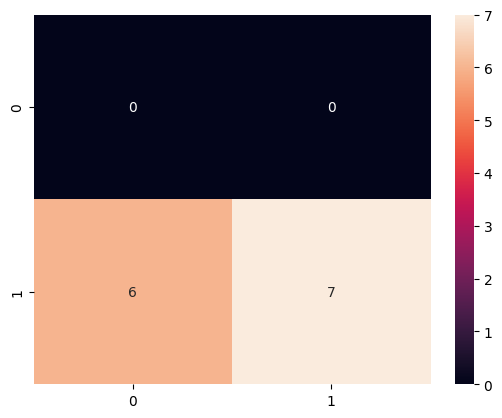

In [42]:
model.heat_map(prediction, y_test)